# Loading Packages 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature
from sklearn.metrics import *
from sklearn.utils.multiclass import unique_labels
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Reading the data

In [2]:
file1 = "/kaggle/input/telecom-customer/Telecom_customer churn.csv"
df = pd.read_csv(file1)

# Showing the first 5 rows

In [13]:
cols=df.columns
num_cols = df._get_numeric_data().columns
len(num_cols)
#len(list(set(cols) - set(num_cols)))

79

In [16]:
df.columns.isnull().sum()

0

# Printing columns with Highest Missing Values


In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df.head(10)

,column_name,percent_missing
numbcars,numbcars,49.366
dwllsize,dwllsize,38.308
HHstatin,HHstatin,37.923
ownrent,ownrent,33.706
dwlltype,dwlltype,31.909
lor,lor,30.190
income,income,25.436
adults,adults,23.019
infobase,infobase,22.079
hnd_webcap,hnd_webcap,10.189


A few columns above have a lot of missing values. Imputing these missing values won't make sense as the % age of missing is as high as 30%. We will drop these columns as a next step

In [22]:
df_wo_null_columns = df.drop(['numbcars', 'dwllsize','HHstatin','ownrent'], axis = 1)

In [49]:
numeric_data = df_wo_null_columns.select_dtypes(include=[np.number])
categorical_data = df_wo_null_columns.select_dtypes(exclude=[np.number])



In [50]:
customer_id=numeric_data['Customer_ID']
target=numeric_data['churn']
numeric_data=numeric_data.drop(['Customer_ID','churn'], axis = 1) 

0    50438
1    49562
Name: churn, dtype: int64

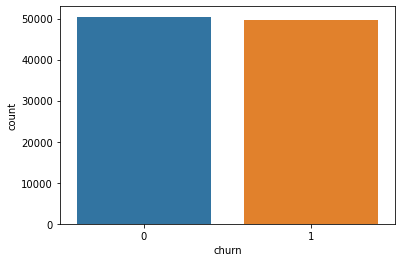

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.countplot(df['churn'])


df['churn'].value_counts()

In [54]:
#Imputing missing value by imputer from sklearn.
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_data_imp=numeric_data.fillna(numeric_data.mean())

categorical_data_imp=categorical_data.fillna(categorical_data.mode())

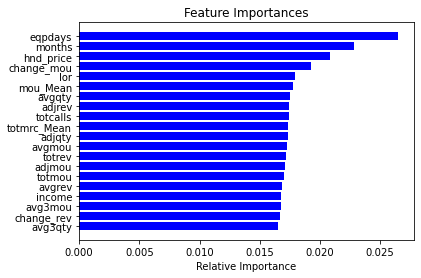

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


features = numeric_data_imp.columns
forest.fit(numeric_data_imp,target)
importances = forest.feature_importances_

indices = np.argsort(importances)

# customized number 
num_features = 20 


plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [68]:
import category_encoders as ce

# Get a new clean dataframe
obj_df = categorical_data_imp.select_dtypes(include=['object']).copy()

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder()
encoder.fit(obj_df, verbose=1)


cat=encoder.transform(obj_df)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


features = cat.columns
forest.fit(cat,target)
importances = forest.feature_importances_

indices = np.argsort(importances)

# customized number 
num_features = 20 


plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'